In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


With an attempt to explain the cause of heart attacks, this notebook explores the major parameters that increases the chances of a heart attack in a human being. Also, the notebook defines a module to detect the chances of a person having a heart attack. This notebook dwells on these basic questions:

Is age and gender really a determining factor for heart diseaes?
What are the bodily factors that causes heart diseases.
Can we predict the chances of a heart disease in a person? If so, how reliable would it be?

About this file
Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs"

Attribute Information:

Only 14 attributes used: 1. #3 (age) 2. #4 (sex) 3. #9 (cp) 4. #10 (trestbps) 5. #12 (chol) 6. #16 (fbs) 7. #19 (restecg) 8. #32 (thalach) 9. #38 (exang) 10. #40 (oldpeak) 11. #41 (slope) 12. #44 (ca) 13. #51 (thal) 14. #58 (num) (the predicted attribute)

Complete attribute documentation: 1 id: patient identification number 2 ccf: social security number (I replaced this with a dummy value of 0) 3 age: age in years 4 sex: sex (1 = male; 0 = female) 5 painloc: chest pain location (1 = substernal; 0 = otherwise) 6 painexer (1 = provoked by exertion; 0 = otherwise) 7 relrest (1 = relieved after rest; 0 = otherwise) 8 pncaden (sum of 5, 6, and 7) 9 cp: chest pain type -- Value 1: typical angina -- Value 2: atypical angina -- Value 3: non-anginal pain -- Value 4: asymptomatic 10 trestbps: resting blood pressure (in mm Hg on admission to the hospital) 11 htn 12 chol: serum cholestoral in mg/dl 13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker) 14 cigs (cigarettes per day) 15 years (number of years as a smoker) 16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 17 dm (1 = history of diabetes; 0 = no such history) 18 famhist: family history of coronary artery disease (1 = yes; 0 = no) 19 restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 20 ekgmo (month of exercise ECG reading) 21 ekgday(day of exercise ECG reading) 22 ekgyr (year of exercise ECG reading) 23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no) 24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no) 25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no) 26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no) 27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no) 28 proto: exercise protocol 1 = Bruce 2 = Kottus 3 = McHenry 4 = fast Balke 5 = Balke 6 = Noughton 7 = bike 150 kpa min/min (Not sure if "kpa min/min" is what was written!) 8 = bike 125 kpa min/min 9 = bike 100 kpa min/min 10 = bike 75 kpa min/min 11 = bike 50 kpa min/min 12 = arm ergometer 29 thaldur: duration of exercise test in minutes 30 thaltime: time when ST measure depression was noted 31 met: mets achieved 32 thalach: maximum heart rate achieved 33 thalrest: resting heart rate 34 tpeakbps: peak exercise blood pressure (first of 2 parts) 35 tpeakbpd: peak exercise blood pressure (second of 2 parts) 36 dummy 37 trestbpd: resting blood pressure 38 exang: exercise induced angina (1 = yes; 0 = no) 39 xhypo: (1 = yes; 0 = no) 40 oldpeak = ST depression induced by exercise relative to rest 41 slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping 42 rldv5: height at rest 43 rldv5e: height at peak exercise 44 ca: number of major vessels (0-3) colored by flourosopy 45 restckm: irrelevant 46 exerckm: irrelevant 47 restef: rest raidonuclid (sp?) ejection fraction 48 restwm: rest wall (sp?) motion abnormality 0 = none 1 = mild or moderate 2 = moderate or severe 3 = akinesis or dyskmem (sp?) 49 exeref: exercise radinalid (sp?) ejection fraction 50 exerwm: exercise wall (sp?) motion 51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 52 thalsev: not used 53 thalpul: not used 54 earlobe: not used 55 cmo: month of cardiac cath (sp?) (perhaps "call") 56 cday: day of cardiac cath (sp?) 57 cyr: year of cardiac cath (sp?) 58 num: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels) 59 lmt 60 ladprox 61 laddist 62 diag 63 cxmain 64 ramus 65 om1 66 om2 67 rcaprox 68 rcadist 69 lvx1: not used 70 lvx2: not used 71 lvx3: not used 72 lvx4: not used 73 lvf: not used 74 cathef: not used 75 junk: not used 76 name: last name of patient (I replaced this with the dummy string "name")

In [2]:
# getting the columns in the dataset

data.columns

NameError: name 'data' is not defined

In [3]:
data.info()

NameError: name 'data' is not defined

In [4]:
#Importing the data

data = pd.read_csv('../input/heart.csv')

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
#exploring the data statistically

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


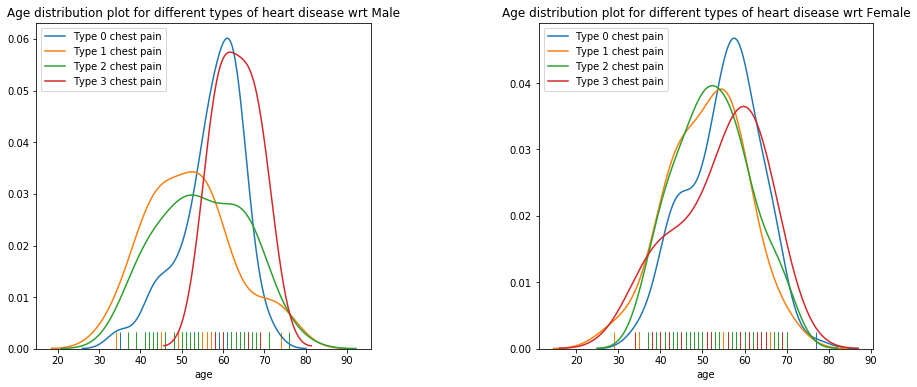

In [6]:
# Understanding the influence of Age on heart diseases, coupled with gender

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (15,6))
n = 0
for gender in [0,1]:
    n = n + 1
    plt.subplot(1,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for c in range(0,4):
        sns.distplot(data['age'][data['cp'] == c][data['sex'] == gender], 
                     hist = False, rug = True, label = 'Type {} chest pain'.format(c))
    plt.title('Age distribution plot for different types of heart disease wrt {}'.
              format('Male' if gender == 0 else 'Female'))
plt.legend()
plt.show()    

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


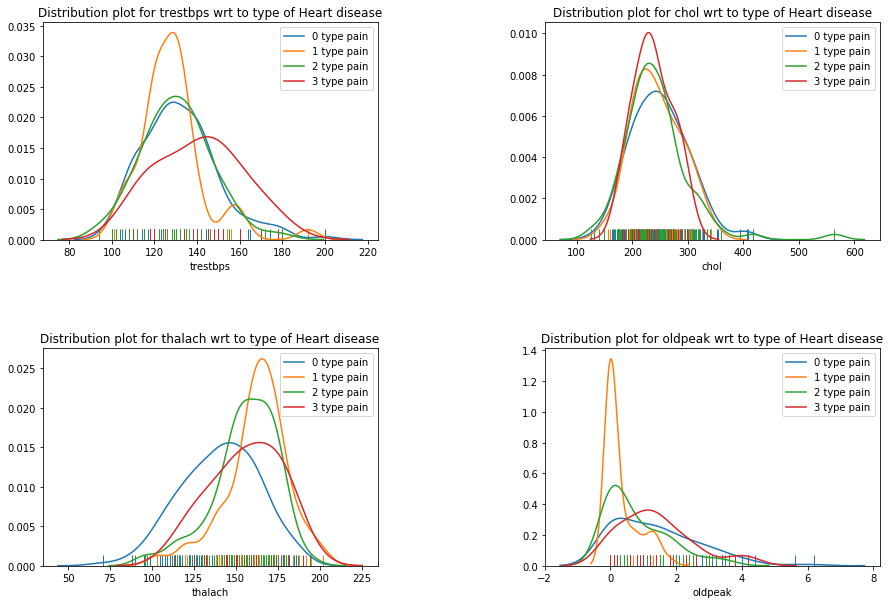

In [7]:
# Visualizing the distribution of parameter values wrt presence of heart disease

param = ['trestbps', 'chol', 'thalach','oldpeak']

plt.figure (1, figsize = (15,10))
n = 0
for p in param:
    n = n + 1
    plt.subplot(2,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for ctype in range(0,4):
            sns.distplot(data[p][data['cp'] == ctype], 
                     hist = False, rug = True, label = "{} type pain".format(ctype))
    plt.title("Distribution plot for {} wrt to type of Heart disease".format(p))
plt.legend()
plt.show() 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


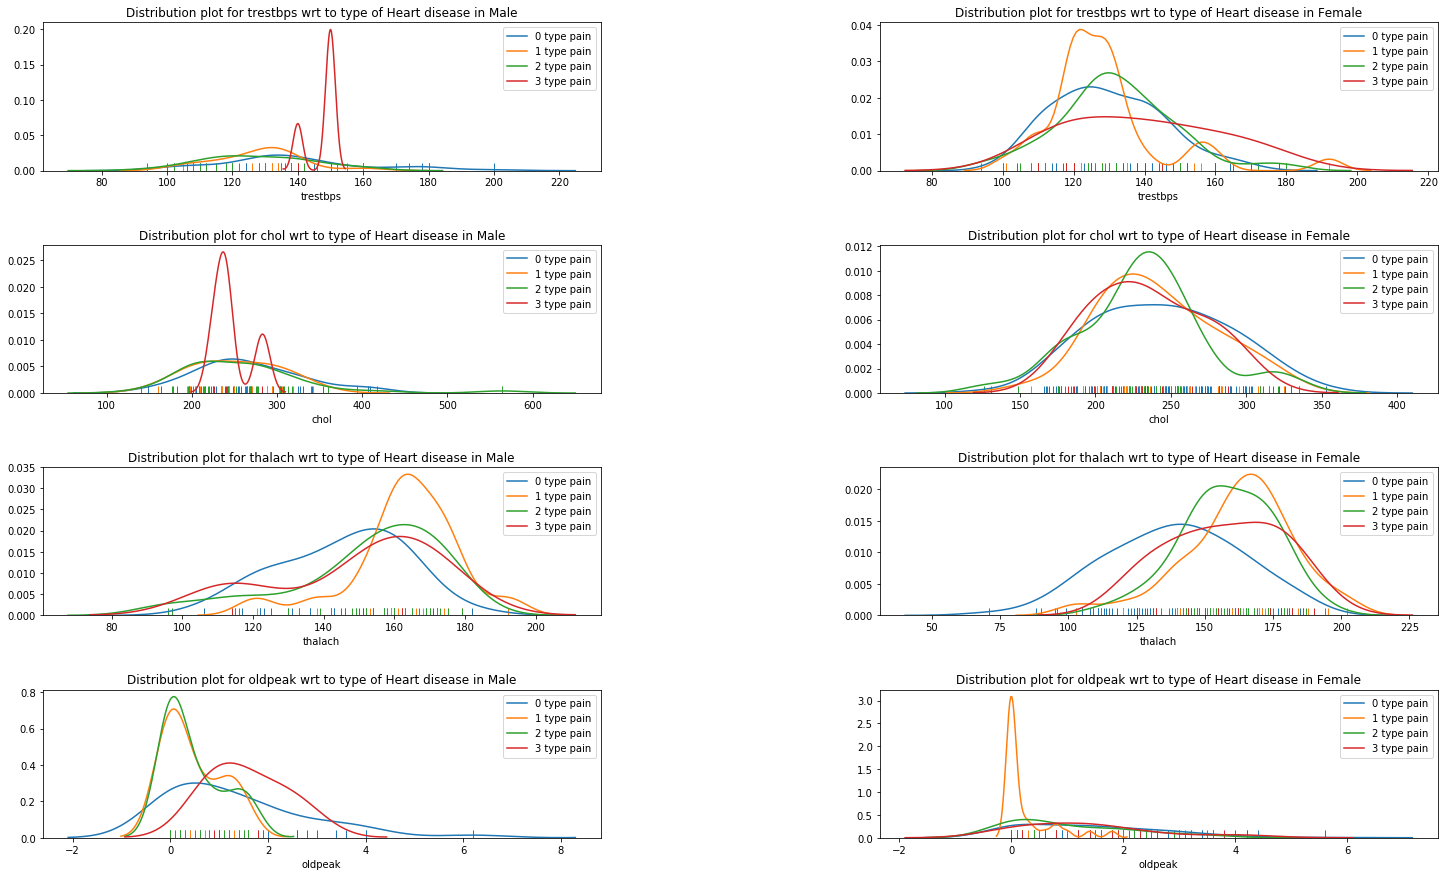

In [8]:
# Determining the influence of gender on heart diseases using the same parameters

param = ['trestbps', 'chol', 'thalach','oldpeak'] 

plt.figure (1, figsize = (25,15))
n = 0
for p in param:
    for gender in [0, 1]:
        n = n + 1
        plt.subplot(4,2, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        for ctype in range(0,4):
            sns.distplot(data[p][data['cp'] == ctype][data['sex'] == gender], 
                     hist = False, rug = True, label = "{} type pain".format(ctype))
        plt.title("Distribution plot for {} wrt to type of Heart disease in {}".
                  format(p, 'Male' if gender == 0 else 'Female'))
plt.legend()
plt.show()

<Figure size 1080x432 with 0 Axes>

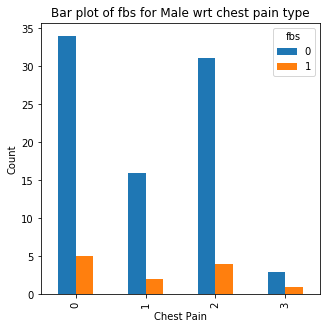

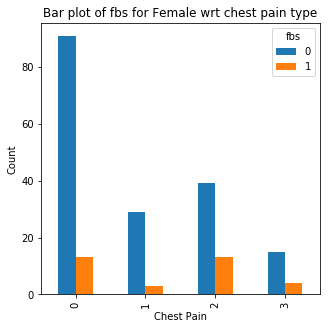

In [9]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0

    
for gender in [0, 1]:
    
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[0]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[0], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

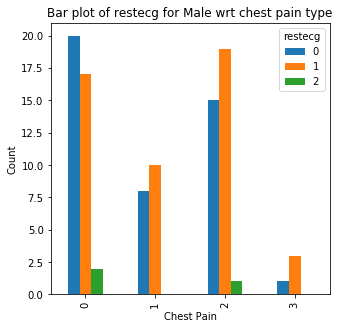

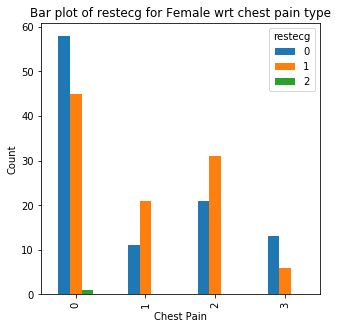

In [10]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[1]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[1], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

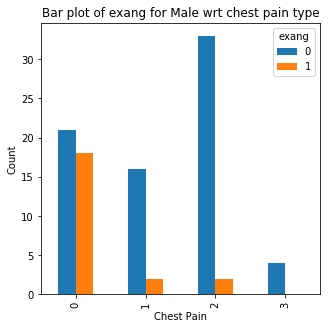

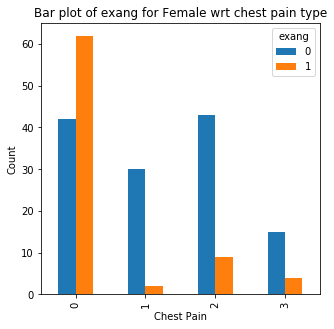

In [11]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[2]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[2], 'Male' if gender == 0 else 'Female'))


<Figure size 1080x432 with 0 Axes>

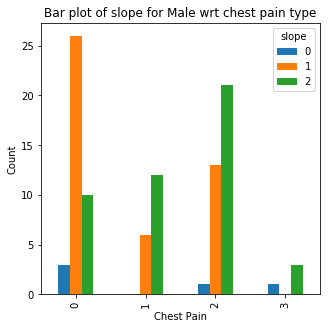

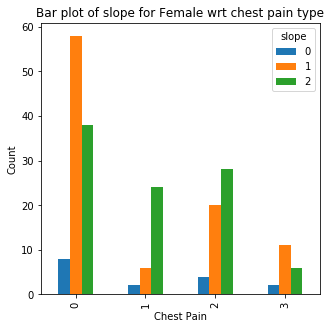

In [12]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[3]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[3], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

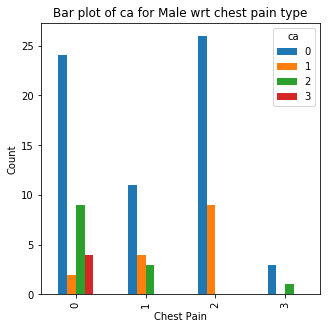

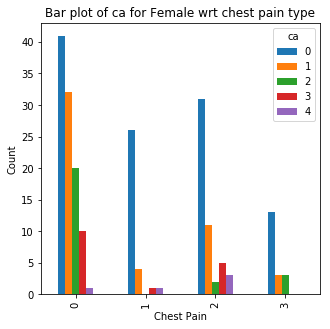

In [13]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[4]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[4], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

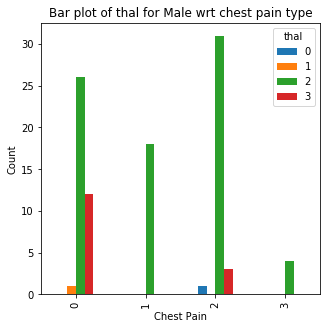

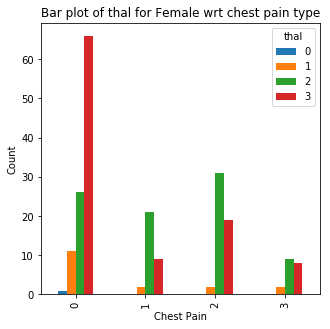

In [14]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[5]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[5], 'Male' if gender == 0 else 'Female'))

A lot of visualizations have been created above, all of which have their own set of information to tell:

fbs = 0 value is equally indicative of no heart disease or type-2 heart disease in MALE, but in FEMALE, the same is indicative of *no heart diseases at all
restecg = 1 value is indicative of no heart disease or type-2 heart disease in MALE, but in FEMALE, the same is more indicative of no heart diseases. The same goes for restecg = 0
exang = 0 is highly indicative of type-2 heart disease in MALE, whereas exang = 1 is indicative of no heart disease in FEMALE
slope = 1 is highly indicative of no heart disease in both MALE and FEMALE, whereas slope= 2 is indicative of type- 2 heart disease in MALE and no heart disease in FEMALE
ca = 0 is equally indicative of type-2 heart disease or no heart disease in MALE
thal = 2 is indicative of type-2 heart disease and somewhat indicative of no heart disease in MALE, but in FEMALE thal = 3 is highly indicative of no heart disease

From the above visualizations, the following basic inferences can be drawn:

Chest pain can be caused by all of the 4 parameters mentioned above, having more or less influence of the type of chest pains
A visibly large proportion of Men having trestbps value between 140-160 and chol value between 200-300 suffers from type-3 chest pain. Similarly, a visibly large proportion of Women having oldpeak value less than 1 experiences from type-1 chest pain.
The distributions graphs show vastly different reasult for male and female, meaning that GENDER have a profound impact on the cause of heart diseases. Also, the chances and the types of chest pains experienced by patients also differ vastly across the two genders.
Age also plays an important role in determining the type of disease.
A large propotion of Men of age 40-60 suffers mostly from type-3 heart disease, but, a similar proportion of men of the same age group have no heart disases at all.
Women mostly don't suffer from any heart diseaes, however, some experience type-2 and type-1 heart diseases at the age of 40-60. Also, type-3 heart diseases are experienced by females in some proportions after the age of 60.
Any discussion about heart diseases and it's causes, without considering gender as a factor is erroneous.

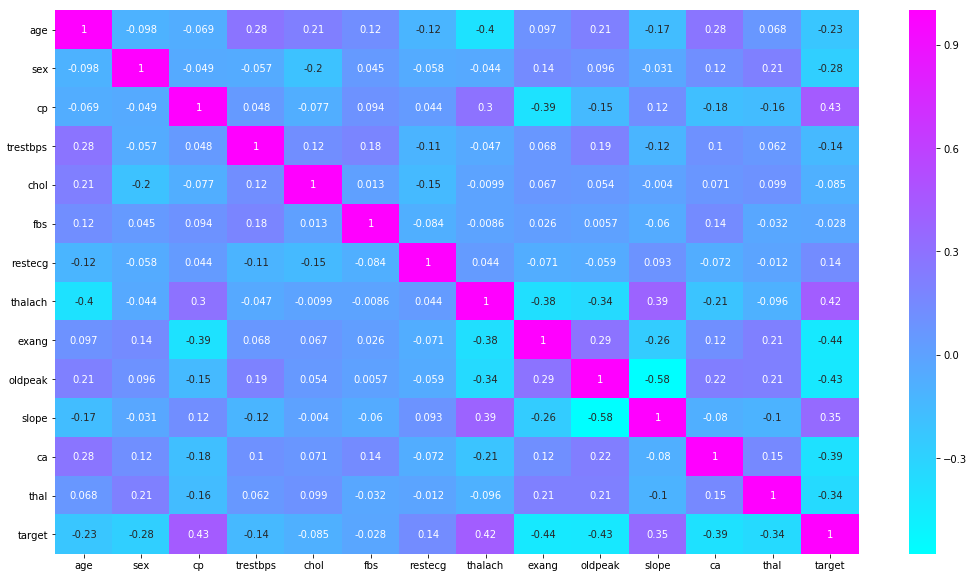

In [15]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, cmap='cool')
plt.show()

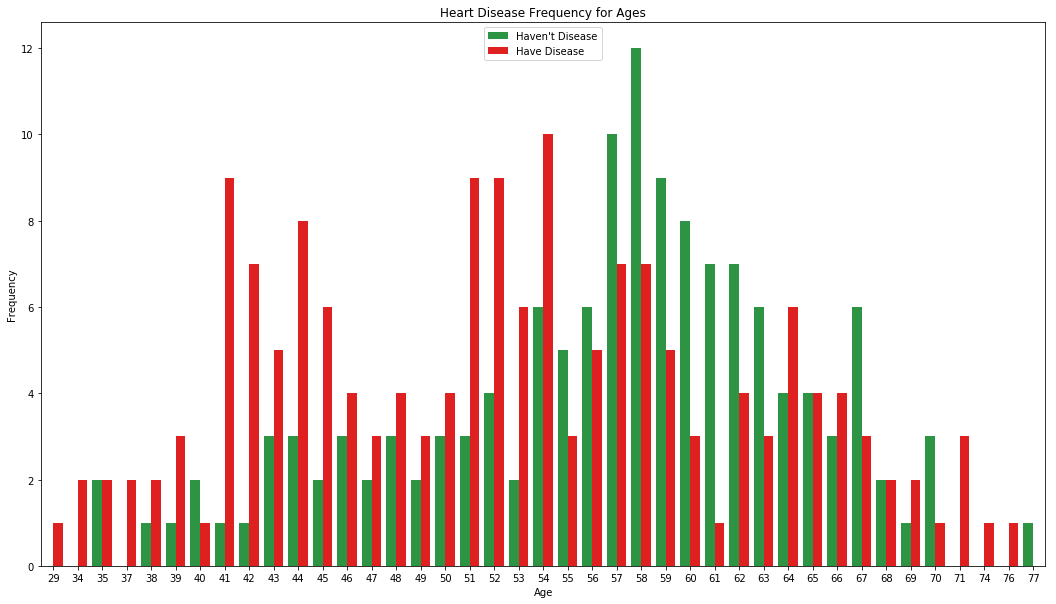

In [16]:
plt.figure(figsize=(18, 10))
sns.countplot(x='age', hue='target', data=data, palette=['#1CA53B', 'red'])
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [17]:

# Define our feasures and leabels
X = data.drop(['target'], axis=1).values
y = data['target'].values
scale = StandardScaler()
X = scale.fit_transform(X)
class Model:
    def __init__(self, model, X, y):
        self.model = model
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.5, random_state=42)
        
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        
    def model_str(self):
        return str(self.model.__class__.__name__)
    
    def crossValScore(self, cv=5):
        print(self.model_str() + "\n" + "="*60)
        scores = ["accuracy", "precision", "recall", "roc_auc"]
        for score in scores:  
            cv_acc = cross_val_score(self.model, 
                                     self.X_train, 
                                     self.y_train, 
                                     cv=cv, 
                                     scoring=score).mean()
            
            print("Model " + score + " : " + "%.3f" % cv_acc)
        
    def accuracy(self):
        accuarcy = accuracy_score(self.y_test, self.y_pred)
        print(self.model_str() + " Model " + "Accuracy is: ")
        return accuarcy
        
    def confusionMatrix(self):        
        plt.figure(figsize=(6, 6))
        mat = confusion_matrix(self.y_test, self.y_pred)
        sns.heatmap(mat.T, square=True, 
                    annot=True, 
                    cbar=False, 
                    xticklabels=["Haven't Disease", "Have Disease"], 
                    yticklabels=["Haven't Disease", "Have Disease"])
        
        plt.title(self.model_str() + " Confusion Matrix")
        plt.xlabel('Predicted Values')
        plt.ylabel('True Values');
        plt.show();
        
    def classificationReport(self):
        print(self.model_str() + " Classification Report" + "\n" + "="*60)
        print(classification_report(self.y_test, 
                                    self.y_pred, 
                                    target_names=['Non Disease', 'Disease']))
    
    def rocCurve(self):
        y_prob = self.model.predict_proba(self.X_test)[:,1]
        fpr, tpr, thr = roc_curve(self.y_test, y_prob)
        lw = 2
        plt.figure(figsize=(10, 8))
        plt.plot(fpr, tpr, 
                 color='darkorange', 
                 lw=lw, 
                 label="Curve Area = %0.3f" % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='green', 
                 lw=lw, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(self.model_str() + ' Receiver Operating Characteristic Plot')
        plt.legend(loc="lower right")
        plt.show()
        clf = Model(model=RandomForestClassifier(n_estimators=1000), X=X, y=y)



In [18]:
clf = Model(model=RandomForestClassifier(n_estimators=1000), X=X, y=y)
clf.crossValScore(cv=10)

RandomForestClassifier
Model accuracy : 0.802
Model precision : 0.813
Model recall : 0.844
Model roc_auc : 0.908


In [19]:
clf.accuracy()

RandomForestClassifier Model Accuracy is: 


0.8355263157894737

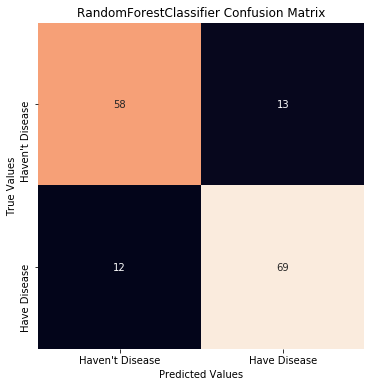

In [20]:
clf.confusionMatrix()

In [21]:
clf.classificationReport()

RandomForestClassifier Classification Report
              precision    recall  f1-score   support

 Non Disease       0.82      0.83      0.82        70
     Disease       0.85      0.84      0.85        82

   micro avg       0.84      0.84      0.84       152
   macro avg       0.83      0.84      0.83       152
weighted avg       0.84      0.84      0.84       152



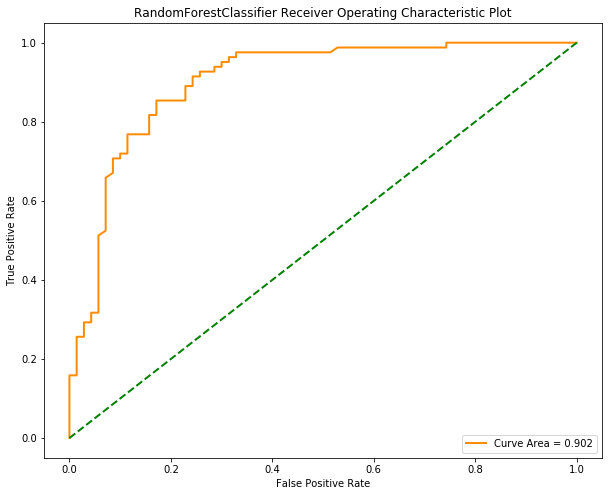

In [22]:
clf.rocCurve()

In [23]:
#C-Support Vector Classification.
svm = Model(model=SVC(C=5, probability=True,gamma='auto'), X=X, y=y)
svm.crossValScore(cv=10)

SVC
Model accuracy : 0.768
Model precision : 0.796
Model recall : 0.771
Model roc_auc : 0.867


In [24]:
svm.accuracy()

SVC Model Accuracy is: 


0.7697368421052632

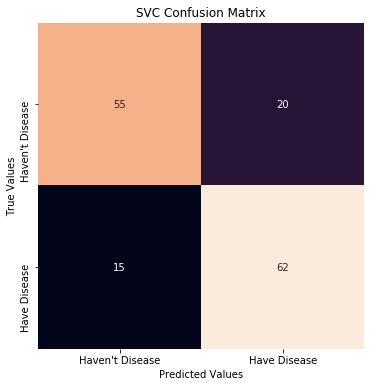

In [25]:
svm.confusionMatrix()

In [26]:
svm.classificationReport()

SVC Classification Report
              precision    recall  f1-score   support

 Non Disease       0.73      0.79      0.76        70
     Disease       0.81      0.76      0.78        82

   micro avg       0.77      0.77      0.77       152
   macro avg       0.77      0.77      0.77       152
weighted avg       0.77      0.77      0.77       152



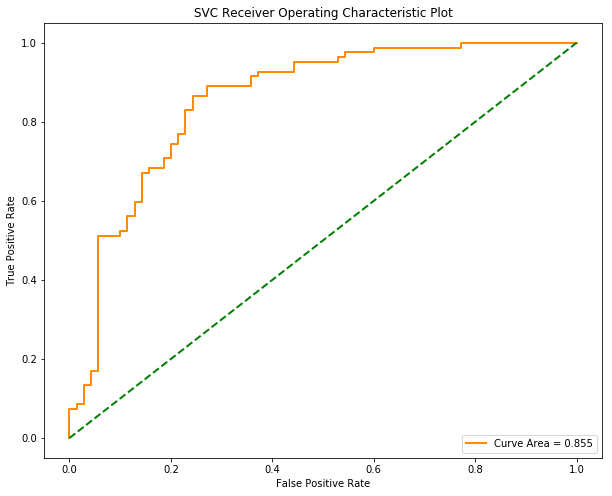

In [27]:
svm.rocCurve()

In [28]:
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer

lr = LogisticRegression(C=10, n_jobs=-1)
pipeline = make_pipeline(QuantileTransformer(output_distribution='normal'), lr)

pip = Model(model=pipeline, X=X, y=y)

In [29]:
pip.crossValScore()

Pipeline
Model accuracy : 0.794
Model precision : 0.814
Model recall : 0.817
Model roc_auc : 0.900


In [30]:
pip.accuracy()

Pipeline Model Accuracy is: 


0.8157894736842105

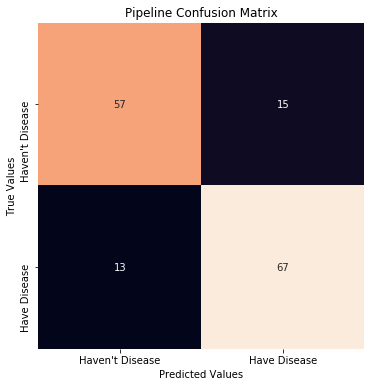

In [31]:
pip.confusionMatrix()

In [32]:
pip.classificationReport()

Pipeline Classification Report
              precision    recall  f1-score   support

 Non Disease       0.79      0.81      0.80        70
     Disease       0.84      0.82      0.83        82

   micro avg       0.82      0.82      0.82       152
   macro avg       0.81      0.82      0.81       152
weighted avg       0.82      0.82      0.82       152



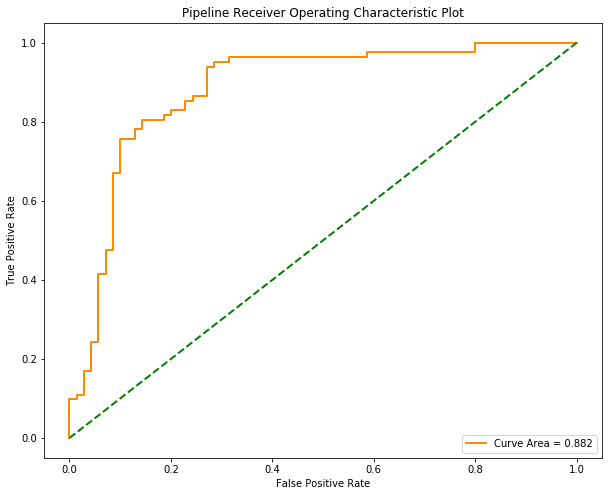

In [33]:
pip.rocCurve()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = Model(model=KNeighborsClassifier(n_neighbors=100), X=X, y=y)

In [35]:
knn.crossValScore()

KNeighborsClassifier
Model accuracy : 0.684
Model precision : 0.638
Model recall : 1.000
Model roc_auc : 0.904


In [36]:
knn.accuracy()

KNeighborsClassifier Model Accuracy is: 


0.7960526315789473

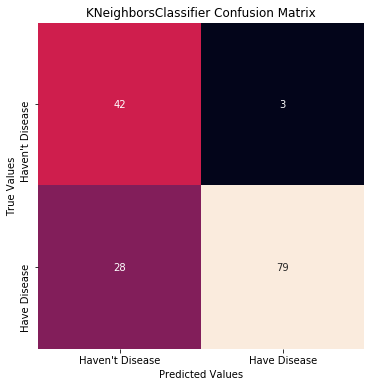

In [37]:
knn.confusionMatrix()

In [38]:
knn.classificationReport()

KNeighborsClassifier Classification Report
              precision    recall  f1-score   support

 Non Disease       0.93      0.60      0.73        70
     Disease       0.74      0.96      0.84        82

   micro avg       0.80      0.80      0.80       152
   macro avg       0.84      0.78      0.78       152
weighted avg       0.83      0.80      0.79       152



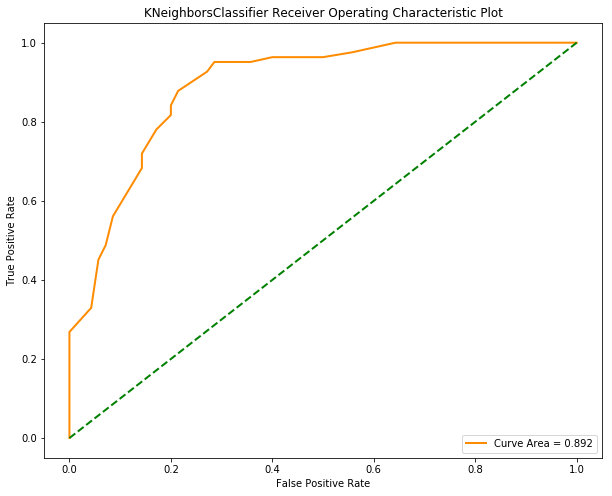

In [39]:
knn.rocCurve()

RandomForestClassifier Model Accuracy is: 
SVC Model Accuracy is: 
Pipeline Model Accuracy is: 
KNeighborsClassifier Model Accuracy is: 


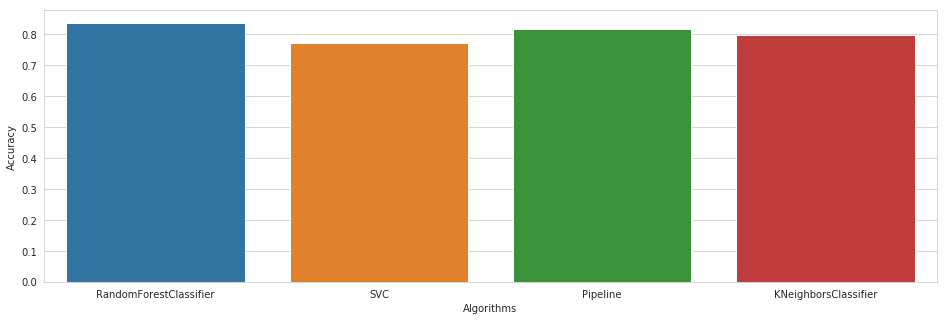

In [40]:
models = [clf, svm, pip, knn]
names = []
accs = []
for model in models:
    accs.append(model.accuracy())
    names.append(model.model_str())
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1.2,0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=names, y=accs)
plt.savefig('models_accuracy.png')
plt.show()